In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ml-100k/u.data",sep='\t',
                 names=['user_id','item_id','rating','ts'])
df.head()

,user_id,item_id,rating,ts
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100000 non-null  int64
 1   item_id  100000 non-null  int64
 2   rating   100000 non-null  int64
 3   ts       100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [4]:
cols = "item_id|title| release date | video release date |\
              IMDb URL | unknown | Action | Adventure | Animation |\
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |\
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |\
              Thriller | War | Western |"
movies = pd.read_csv('ml-100k/u.item',sep='|',names=cols.split('|'))
movies.head()

,item_id,title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,NaN
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN


In [5]:
movies[['item_id','title']].head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
data = pd.merge(df.drop('ts',axis=1),movies[['item_id','title']],on='item_id')
data.head()

,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  100000 non-null  int64 
 1   item_id  100000 non-null  int64 
 2   rating   100000 non-null  int64 
 3   title    100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.8+ MB


In [8]:
data.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [9]:
data['title'].nunique()

1664

In [10]:
data['user_id'].nunique()

943

In [11]:
avg_rates = data.groupby('title')['rating'].mean()

In [12]:
avg_rates.sort_values(ascending=False).head(20)

title
They Made Me a Criminal (1939)                            5.000000
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Saint of Fort Washington, The (1993)                      5.000000
Someone Else's America (1995)                             5.000000
Star Kid (1997)                                           5.000000
Great Day in Harlem, A (1994)                             5.000000
Aiqing wansui (1994)                                      5.000000
Santa with Muscles (1996)                                 5.000000
Prefontaine (1997)                                        5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Pather Panchali (1955)                                    4.625000
Some Mother's Son (1996)                                  4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Anna (1996)                                               4.500000
Everest (1998)                                          

In [13]:
#rate
rate_count = data.groupby('title')['rating'].count()
rate_count.head(20)

title
'Til There Was You (1997)                        9
1-900 (1994)                                     5
101 Dalmatians (1996)                          109
12 Angry Men (1957)                            125
187 (1997)                                      41
2 Days in the Valley (1996)                     93
20,000 Leagues Under the Sea (1954)             72
2001: A Space Odyssey (1968)                   259
3 Ninjas: High Noon At Mega Mountain (1998)      5
39 Steps, The (1935)                            59
8 1/2 (1963)                                    38
8 Heads in a Duffel Bag (1997)                   4
8 Seconds (1994)                                 4
A Chef in Love (1996)                            8
Above the Rim (1994)                             5
Absolute Power (1997)                          127
Abyss, The (1989)                              151
Ace Ventura: Pet Detective (1994)              103
Ace Ventura: When Nature Calls (1995)           37
Across the Sea of Time (1

In [14]:
rate_count.sort_values(ascending=False).head(20)

title
Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: rating, dtype: int64

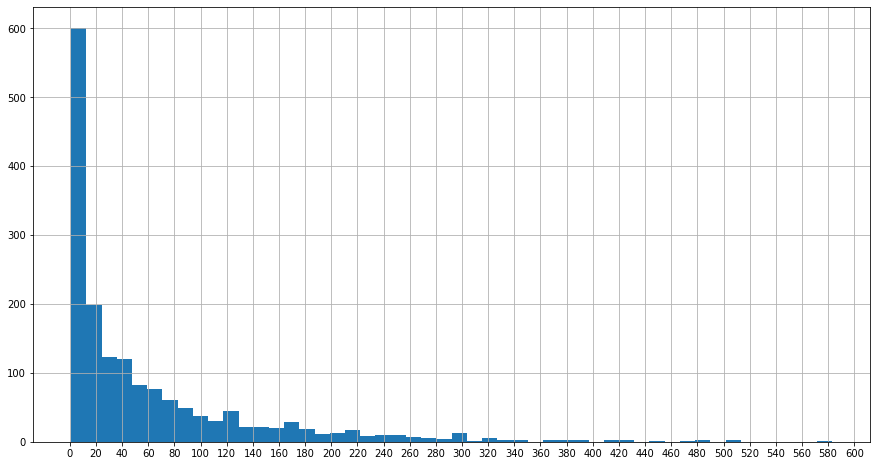

In [15]:
plt.figure(figsize=(15,8))
rate_count.hist(bins=50)
plt.xticks(range(0,601,20))
plt.show()

<AxesSubplot:>

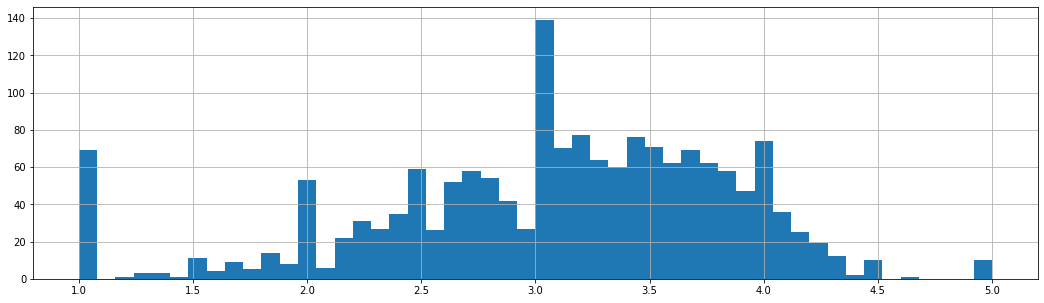

In [16]:
plt.figure(figsize=(18,5))
avg_rates.hist(bins=50)

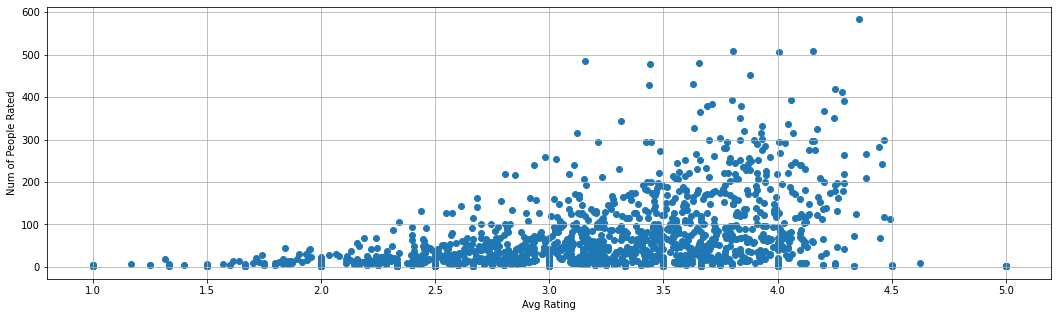

In [17]:
plt.figure(figsize=(18,5))
plt.scatter(x=avg_rates,y=rate_count)
plt.xlabel("Avg Rating")
plt.ylabel("Num of People Rated")
plt.grid()

In [18]:
df_pivot = data.pivot_table(index='user_id',columns='title',
                           values='rating')
df_pivot.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [19]:
# inp = 'Star Wars (1977)'
inp = 'Age of Innocence, The (1993)'

In [20]:
df_pivot[inp].head()

user_id
1    NaN
2    NaN
3    NaN
4    NaN
5    3.0
Name: Age of Innocence, The (1993), dtype: float64

In [21]:
sim_inp = df_pivot.corrwith(df_pivot[inp])

In [22]:
sim_inp

title
'Til There Was You (1997)                1.000000
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.531490
12 Angry Men (1957)                      0.420304
187 (1997)                               0.327327
                                           ...   
Young Guns II (1990)                     0.310087
Young Poisoner's Handbook, The (1995)   -0.455842
Zeus and Roxanne (1997)                       NaN
unknown                                       NaN
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [23]:
sim_df = pd.DataFrame(sim_inp,columns=['Correlation'])
sim_df.head()

,Correlation
title,
'Til There Was You (1997),1.000000
1-900 (1994),NaN
101 Dalmatians (1996),0.531490
12 Angry Men (1957),0.420304
187 (1997),0.327327


In [24]:
sim_df.sort_values(by='Correlation',ascending=False).head(20)

,Correlation
title,
Pushing Hands (1992),1.0
Kim (1950),1.0
Last Summer in the Hamptons (1995),1.0
Trial by Jury (1994),1.0
"Steal Big, Steal Little (1995)",1.0
Two Deaths (1995),1.0
The Innocent (1994),1.0
"Age of Innocence, The (1993)",1.0
Feast of July (1995),1.0


In [25]:
sim_df['Count'] = rate_count

In [26]:
sim_df['avg_rate'] = avg_rates

In [27]:
sim_df

,Correlation,Count,avg_rate
title,,,
'Til There Was You (1997),1.000000,9,2.333333
1-900 (1994),NaN,5,2.600000
101 Dalmatians (1996),0.531490,109,2.908257
12 Angry Men (1957),0.420304,125,4.344000
187 (1997),0.327327,41,3.024390
...,...,...,...
Young Guns II (1990),0.310087,44,2.772727
"Young Poisoner's Handbook, The (1995)",-0.455842,41,3.341463
Zeus and Roxanne (1997),NaN,6,2.166667


In [28]:
sim_df.sort_values(by=['Count'],ascending=False).head(20)

,Correlation,Count,avg_rate
title,,,
Star Wars (1977),-0.037176,583,4.358491
Contact (1997),0.097317,509,3.803536
Fargo (1996),0.041141,508,4.155512
Return of the Jedi (1983),-0.050416,507,4.007890
Liar Liar (1997),0.088585,485,3.156701
"English Patient, The (1996)",0.529909,481,3.656965
Scream (1996),-0.033839,478,3.441423
Toy Story (1995),0.365547,452,3.878319
Air Force One (1997),-0.156560,431,3.631090


In [29]:
sim_df[(sim_df['Count'] > 100)].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,Count,avg_rate
title,,,
"Crying Game, The (1992)",0.678807,119,3.621849
Little Women (1994),0.611227,102,3.676471
Ulee's Gold (1997),0.610170,184,3.760870
"Remains of the Day, The (1993)",0.542751,150,3.940000
101 Dalmatians (1996),0.531490,109,2.908257
"English Patient, The (1996)",0.529909,481,3.656965
Kolya (1996),0.527735,117,3.991453
Chinatown (1974),0.516908,147,4.136054
"Boot, Das (1981)",0.513491,201,4.203980


In [30]:
recom = sim_df[(sim_df['Count'] > 100)].sort_values(by='Correlation',ascending=False).head(10)
recom.drop(inp,axis=0,inplace=True,errors='ignore')
recommended = recom.index[:3]
for r in recommended:
    print(r)

Crying Game, The (1992)
Little Women (1994)
Ulee's Gold (1997)
